# 00 Init

## Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setting to use py files

In [2]:
import os

In [3]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [4]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [5]:
! pip install codes

## Import py files

In [6]:
# baseline : Env, Agent
# from codes.environment.reward5 import *
from codes.environment.reward5 import *
from codes.agent.vectorDQN import *
from codes.net.basic import *
from codes.trainer.validShutDown import *
from codes.tester.basic import *
# import codes.trainer.trainerWithValidShutDown as Trainer


## 01 Train

## level dictionary

In [11]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [12]:
# Environment settings
MEM_SIZE = 200000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.001
LEARN_DECAY = 0.9999975
LEARN_MIN = 0.0001 # 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.999975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 64
UPDATE_TARGET_EVERY = 5

## Agents

In [13]:
class PrefixedAgent(Agent):
    def __init__(self, env, net, **kwargs):
        super().__init__(env, net, **kwargs)

    def get_action(self, state):
        '''
        get_action은 하나의 state_img만을 받는다.
        '''

        return 72

In [14]:
class RandomAgent(Agent):
    def __init__(self, env, net, **kwargs):
        super().__init__(env, net, **kwargs)

    def get_action(self, state):
        '''
        get_action은 하나의 state_img만을 받는다.
        '''
        # take random action
        action = np.random.choice(range(self.env.total_tiles))

        return action

In [16]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'])

net = Net(input_dims=env.state.shape,
          n_actions=env.total_tiles,
          conv_units=CONV_UNITS)

prefixed_agent = PrefixedAgent(env=env,
                                net=net,
                                MEM_SIZE=MEM_SIZE,
                                MEM_SIZE_MIN=MEM_SIZE_MIN,
                                BATCH_SIZE=BATCH_SIZE,
                                LEARNING_RATE=LEARNING_RATE,
                                LEARN_DECAY=LEARN_DECAY,
                                LEARN_MIN=LEARN_MIN,
                                DISCOUNT=DISCOUNT,
                                EPSILON=EPSILON,
                                EPSILON_DECAY=EPSILON_DECAY,
                                EPSILON_MIN=EPSILON_MIN,
                                UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

random_agent = RandomAgent(env=env,
                        net=net,
                        MEM_SIZE=MEM_SIZE,
                        MEM_SIZE_MIN=MEM_SIZE_MIN,
                        BATCH_SIZE=BATCH_SIZE,
                        LEARNING_RATE=LEARNING_RATE,
                        LEARN_DECAY=LEARN_DECAY,
                        LEARN_MIN=LEARN_MIN,
                        DISCOUNT=DISCOUNT,
                        EPSILON=EPSILON,
                        EPSILON_DECAY=EPSILON_DECAY,
                        EPSILON_MIN=EPSILON_MIN,
                        UPDATE_TARGET_EVERY=UPDATE_TARGET_EVERY)

## 02 Test

In [31]:
EPISODES = 10000
num_revealed = []

for i in range(EPISODES):

    env.reset()

    n_revealed = 0

    current_state = env.state

    # action = random_agent.get_action(current_state)
    action = prefixed_agent.get_action(current_state)

    next_state, reward, done = env.step(action)

    num_revealed.append(np.sum(next_state != env.unrevealed))

# print(f"Valid n:{epoch} | Median progress: {np.median(progress_list):.2f}, Median reward: {np.median(ep_rewards):.2f}, Win rate : {np.sum(wins_list)/len(wins_list)}")


In [27]:
pd.DataFrame(num_revealed).describe()

,0
count,10000.000000
mean,15.361600
std,20.091695
min,1.000000
25%,1.000000
50%,1.000000
75%,31.000000
max,69.000000


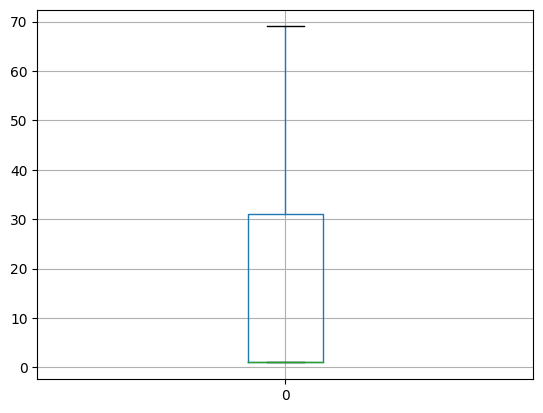

In [30]:
pd.DataFrame(num_revealed).boxplot()
plt.show()

In [32]:
pd.DataFrame(num_revealed).describe()

,0
count,10000.00000
mean,18.83680
std,19.38945
min,1.00000
25%,1.00000
50%,11.00000
75%,34.00000
max,69.00000


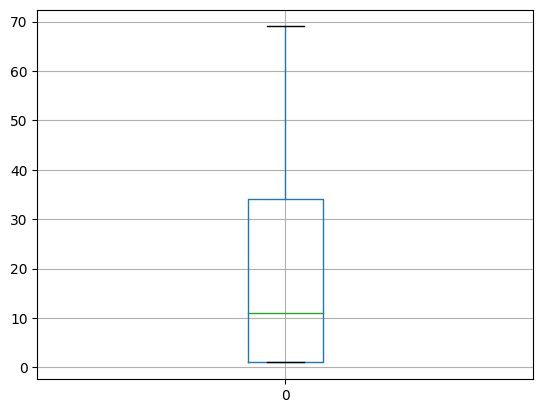

In [33]:
pd.DataFrame(num_revealed).boxplot()
plt.show()